# Autorzy

- Mateusz Łopaciński
- Mateusz Mazur

# Przygotowanie danych

## Wczytanie danych

W pierwszej kolejności wczytamy dane ze zbiorów danych, na których będziemy pracować.

In [1]:
import pandas as pd

column_names = ['x', 'y', 'class']

flame_df = pd.read_csv('data/flame.txt', sep='\t', header=None, names=column_names)
jain_df = pd.read_csv('data/jain.txt', sep='\t', header=None, names=column_names)

Zobaczmy, czy dane zostały prawidłowo wczytane (czy zgadzają się typy danych)

In [2]:
flame_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       240 non-null    float64
 1   y       240 non-null    float64
 2   class   240 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.8 KB


In [3]:
jain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       373 non-null    float64
 1   y       373 non-null    float64
 2   class   373 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 8.9 KB


Sprawdźmy również kilka początkowych wartości z obu zbiorów

In [4]:
flame_df.head()

,x,y,class
0,1.85,27.80,1
1,1.35,26.65,1
2,1.40,23.25,2
3,0.85,23.05,2
4,0.50,22.35,2


In [5]:
jain_df.head()

,x,y,class
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2
3,5.25,14.20,2
4,4.90,15.65,2


## Podział na zbiorów danych na zbiory cech i klasy

In [6]:
X_flame, y_flame = flame_df.values[:, :2], flame_df.values[:, 2]
X_jain, y_jain = jain_df.values[:, :2], jain_df.values[:, 2]

# SVM

## Pomocnicze funkcje

In [39]:
from matplotlib import pyplot as plt
from sklearn import svm
import numpy as np

def svc_plot(svc, X, y):
    h = .02  # mesh step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create a meshgrid to plot a contour plot of the decision boundary
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    
    # Predict the class of each point in the meshgrid
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Create a contour plot of the decision boundary
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
    
    # Create a scatter plot of the data points
    scatter = ax.scatter(
        X[:, 0], 
        X[:, 1], 
        c=y, 
        cmap=plt.cm.Dark2, 
        s=30,
        edgecolors='k', 
        linewidth=0.5
    )
    
    # Calculate margins
    w = svc.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(x_min, x_max)
    yy = a * xx - (svc.intercept_[0]) / w[1]
    margin = 1 / np.sqrt(np.sum(svc.coef_ ** 2))
    upper_margin = yy + a * margin
    lower_margin = yy - a * margin
    
    # Plot the hyperplane and margins
    ax.plot(xx, yy, 'k-')
    ax.plot(xx, upper_margin, 'k--')
    ax.plot(xx, lower_margin, 'k--')
    
    # Add the legend and axis labels
    classes = np.unique(y)
    labels = ['Class {}'.format(int(c)) for c in classes]
    plt.legend(handles=scatter.legend_elements()[0], labels=labels, loc='best', fontsize=15)

    ax.set_xlabel('x', )
    ax.set_ylabel('y', fontsize=15)

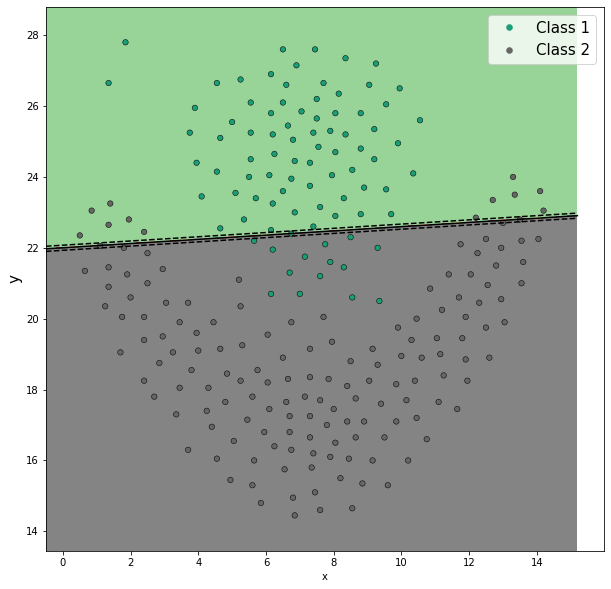

In [41]:
# TODO - remove this test code
C = 1.0  # regularyzacja
svc = svm.SVC(kernel='linear', C=C).fit(X_flame, y_flame)
    
svc_plot(svc, X_flame, y_flame)

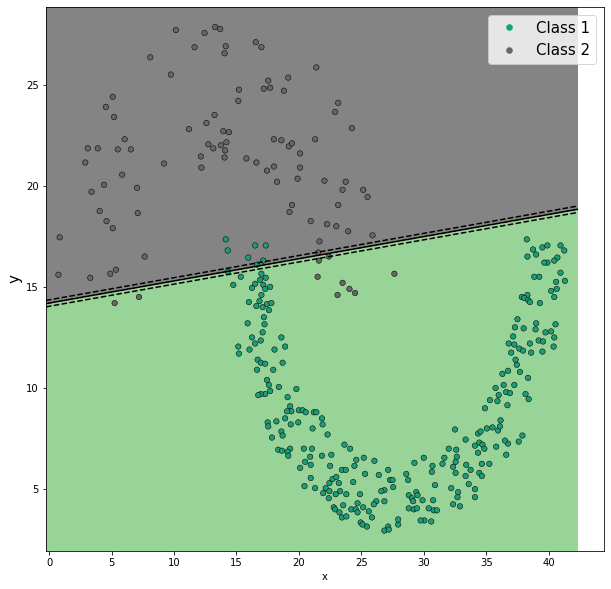

In [42]:
# TODO - remove this test code
C = 1.0  # regularyzacja
svc = svm.SVC(kernel='linear', C=C).fit(X_jain, y_jain)
    
svc_plot(svc, X_jain, y_jain)

## Liniowy SVM